# AR5 - CRU deltas styles

This notebook is for exploring and configuring the styles to be used in the deltas coverage ([iem_cru_ar5_deltas_2km_taspr_seasonal](http://zeus.snap.uaf.edu:8080/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST=DescribeCoverage&COVERAGEID=iem_cru_ar5_deltas_2km_taspr_seasonal)). 

In [15]:
# load libraries and setup

import json
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm


base_url = "http://zeus.snap.uaf.edu:8080/rasdaman//ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST={}"
# stat index 3 is mean
wcs_url = base_url.format("GetCoverage&COVERAGEID=iem_cru_ar5_deltas_2km_taspr_seasonal&FORMAT=application/netcdf")


In [10]:
# downloads all of the deltas data
r = requests.get(wcs_url)
deltas_ds = xr.open_dataset(io.BytesIO(r.content))

## Histograms

Plot some histograms of these data. 

In [38]:
# plot histograms function
def plot_hist(arr):
    n, bins, patches = plt.hist(
        x=arr.flatten(), bins=10, color='#0504aa', alpha=0.7
    )
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    return bins

### Precipitation

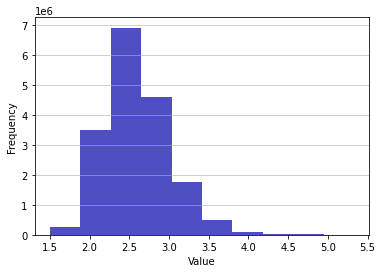

In [98]:
pr_arr = deltas_ds["Gray"].sel(varname=0).values
pr_bins = plot_hist(pr_arr)

### Temperature

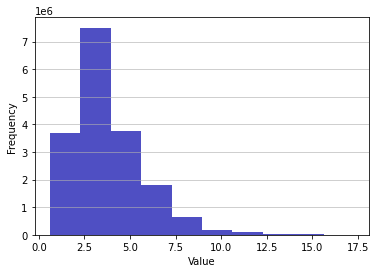

In [42]:
tas_arr = deltas_ds["Gray"].sel(varname=1).values
tas_bins = plot_hist(tas_arr)

### Color Maps

Experiment with making some color maps for rasdaman.

In [154]:
# normalize the bins to [0, 1]
def norm_bin(b, bmin, bmax):
    return (b - bmin) / (bmax - bmin)

# scale normalized rgba list by 255
def scale_rgba(rgba):
    return list(np.round(np.array(rgba) * 255))


viridis = cm.get_cmap('viridis', 12)
# only go up to -1
bmin =pr_bins[0]
# add some padding so that normalization gets
# close to the max of the color map
bmax = pr_bins[-2] + 0.001
color_table = {str(b): scale_rgba(viridis(norm_bin(b, bmin, bmax))) for b in pr_bins[:-1]}

In [157]:
json.dumps(color_table)

'{"1.5": [68.0, 1.0, 84.0, 255.0], "1.883": [72.0, 33.0, 115.0, 255.0], "2.266": [67.0, 62.0, 133.0, 255.0], "2.649": [56.0, 88.0, 140.0, 255.0], "3.032": [37.0, 133.0, 142.0, 255.0], "3.415": [30.0, 155.0, 138.0, 255.0], "3.7979999": [42.0, 176.0, 127.0, 255.0], "4.1809998": [134.0, 213.0, 73.0, 255.0], "4.564": [194.0, 223.0, 35.0, 255.0], "4.947": [253.0, 231.0, 37.0, 255.0]}'

In [53]:
# copy and paste that into here, add 
{
  "type": "intervals",
  "colorTable": {
    "-9999": [0, 0, 0, 0],
    "1.5": [68.0, 1.0, 84.0, 255.0], 
    "1.883": [72.0, 33.0, 115.0, 255.0], 
    "2.266": [67.0, 62.0, 133.0, 255.0], 
    "2.649": [56.0, 88.0, 140.0, 255.0],
    "3.032": [37.0, 133.0, 142.0, 255.0], 
    "3.415": [30.0, 155.0, 138.0, 255.0], 
    "3.7979999": [42.0, 176.0, 127.0, 255.0], 
    "4.1809998": [134.0, 213.0, 73.0, 255.0], 
    "4.564": [194.0, 223.0, 35.0, 255.0], 
    "4.947": [253.0, 231.0, 37.0, 255.0]
  }
}

[This is an example WMS query](http://zeus.snap.uaf.edu:8080/rasdaman/ows?service=WMS&version=1.3.0&request=GetMap&layers=iem_cru_ar5_deltas_2km_taspr_seasonal&bbox=-739223.2060877988,518412.932644147,1820776.7939122012,2380412.932644147&period=0&season=0&model=0&scenario=0&varname=0&width=1280&height=931&crs=EPSG:3338&format=image/png&transparent=true&styles=precipitation) for the whole extent using a style called precipitation. 